In [1]:
import sys

#key python packages
import pandas as pd
import numpy as np
import scipy
import math

#data visualization
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
import seaborn as sns
%matplotlib inline

# pySEAS packages
sys.path.append('/home/feldheimlab/Documents/pySEAS/')
from seas.hdf5manager import hdf5manager as h5
from seas.waveletAnalysis import waveletAnalysis as wave
from seas.ica import *

# plt.style.use('publication')
dataset_path = '/media/feldheimlab/DF Transfer/misc - IS THIS YOURS/p21_20m/'
plt.rcParams['font.size'] = 8

save = True
save_dir = '/home/feldheimlab/Desktop/figures/'


In [2]:
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [3]:
file = '190508_07-08_ica.hdf5'
h = h5(dataset_path + file)
print(h.print())


Opening File to read...
/media/feldheimlab/DF Transfer/misc - IS THIS YOURS/p21_20m/190508_07-08_ica.hdf5 has the following keys:
	- ROI_timecourses
	- artifact_components
	- artifact_mask
	- artifact_timecourse
	- domain_ROIs
	- eig_mix
	- eig_val
	- eig_vec
	- expmeta
	- filter
	- flipped
	- lag1
	- lag1_full
	- mean
	- mean_filter_meta
	- mean_filtered
	- noise_components
	- region_assignment
	- roimask
	- svd_eigval
	- thresholds
	- timecourses
/media/feldheimlab/DF Transfer/misc - IS THIS YOURS/p21_20m/190508_07-08_ica.hdf5 has the following attributes:
	- PCAtype
	- cutoff
	- increased_cutoff
	- n_components
	- region_labels
	- shape
	- svd_cutoff
	- svd_multiplier
	- time
Closing file...

None


In [4]:
flipped = h.load('flipped')
tcourse = h.load('timecourses')

#flipped the inverted timeseries
tcourse = (np.multiply(tcourse.T, flipped)).T
roimask = h.load('roimask')

#load eig_vec
eig_vec = h.load('eig_vec')
thresh = h.load('thresholds')

In [5]:
pc_id = [61, 156, 316, 35, 174, 362] 

eigenbrain_s = rebuild_eigenbrain(eig_vec, pc_id[0], roimask=roimask, eigb_shape=None, 
    maskind=None)
eigenbrain_s2 = rebuild_eigenbrain(eig_vec, pc_id[3], roimask=roimask, eigb_shape=None, 
    maskind=None)
eigenbrain_a = rebuild_eigenbrain(eig_vec, pc_id[1], roimask=roimask, eigb_shape=None, 
    maskind=None)
eigenbrain_a2 = rebuild_eigenbrain(eig_vec, pc_id[4], roimask=roimask, eigb_shape=None, 
    maskind=None)
eigenbrain_o = rebuild_eigenbrain(eig_vec, pc_id[2], roimask=roimask, eigb_shape=None, 
    maskind=None)
eigenbrain_o2 = rebuild_eigenbrain(eig_vec, pc_id[5], roimask=roimask, eigb_shape=None, 
    maskind=None)

eigenbrain_s = np.rot90(eigenbrain_s, 2)*flipped[pc_id[0]]
eigenbrain_a = np.rot90(eigenbrain_a, 2)*flipped[pc_id[1]]
eigenbrain_o = np.rot90(eigenbrain_o, 2)*flipped[pc_id[2]]
eigenbrain_s2 = np.rot90(eigenbrain_s2, 2)*flipped[pc_id[3]]
eigenbrain_a2 = np.rot90(eigenbrain_a2, 2)*flipped[pc_id[4]]
eigenbrain_o2 = np.rot90(eigenbrain_o2, 2)*flipped[pc_id[5]]

# del eig_vec
thresh_s = thresh[pc_id[0]]
thresh_a = thresh[pc_id[1]]
thresh_o = thresh[pc_id[2]]
thresh_s2 = thresh[pc_id[3]]
thresh_a2 = thresh[pc_id[4]]
thresh_o2 = thresh[pc_id[5]]

tc_s = tcourse[pc_id[0]]# '190508_06_ica.hdf5'
tc_a = tcourse[pc_id[1]]# '190508_06_ica.hdf5'
tc_o = tcourse[pc_id[2]]# '190508_06_ica.hdf5'
tc_s2 = tcourse[pc_id[3]]# '190508_06_ica.hdf5'
tc_a2 = tcourse[pc_id[4]]# '190508_06_ica.hdf5'
tc_o2 = tcourse[pc_id[5]]# '190508_06_ica.hdf5'

/tmp/ipykernel_412920/4128542812.py:39: UserWarning: No contour levels were found within the data range.
  axs0.contour(X, Y, roi, colors='k', levels=[0,1], linewidths=1)
/tmp/ipykernel_412920/4128542812.py:66: UserWarning: No contour levels were found within the data range.
  axs2.contour(X, Y, roi, colors='k', levels=[0,1], linewidths=1)
/tmp/ipykernel_412920/4128542812.py:73: UserWarning: No contour levels were found within the data range.
  axs3.contour(X, Y, roi, colors='k', levels=[0,1], linewidths=1)
/tmp/ipykernel_412920/4128542812.py:98: UserWarning: No contour levels were found within the data range.
  axs5.contour(X, Y, roi, colors='k', levels=[0,1], linewidths=1)
/tmp/ipykernel_412920/4128542812.py:104: UserWarning: No contour levels were found within the data range.
  axs6.contour(X, Y, roi, colors='k', levels=[0,1], linewidths=1)
/tmp/ipykernel_412920/4128542812.py:138: UserWarning: No contour levels were found within the data range.
  axs8.contour(X, Y, roi, colors='k', 

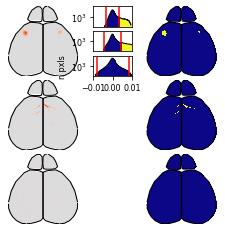

In [6]:
# fig, axs = plt.subplots(7,1, figsize=(5,15))

import matplotlib
col = matplotlib.cm.get_cmap('plasma')

#load mask
roimask = h.load('roimask')

fig = plt.figure(figsize=(4,4))

gs = matplotlib.gridspec.GridSpec(9, 5)

axs0 = fig.add_subplot(gs[:3, :2])
axs1 = fig.add_subplot(gs[0, 2])
axs2 = fig.add_subplot(gs[:3, 3:])

axs3 = fig.add_subplot(gs[3:6, :2])
axs4 = fig.add_subplot(gs[1, 2])
axs5 = fig.add_subplot(gs[3:6, 3:])


axs6 = fig.add_subplot(gs[6:, :2])
axs7 = fig.add_subplot(gs[2, 2])
axs8 = fig.add_subplot(gs[6:, 3:])

roimask = roimask.astype(np.float32)
roi = np.rot90(roimask.copy(),2)
roimask[roimask==0]=np.nan

icmin = -0.010 
icmax = 0.010

X,Y=np.meshgrid(np.arange(0,roi.shape[1],1), np.arange(0,roi.shape[0],1))

im1 = axs0.imshow(eigenbrain_s, clim=(icmin,icmax), 
                  norm=MidpointNormalize(midpoint=0,vmin=icmin, vmax=icmax),
                  cmap= 'coolwarm', aspect=1)

axs0.contour(X, Y, roi, colors='k', levels=[0,1], linewidths=1)
axs0.set_xlim([-30,roi.shape[1]+30])
axs0.set_xlim([-30,roi.shape[0]+30])

axs0.axis('off')


all_val = eigenbrain_s[~np.isnan(eigenbrain_s)]

upper = np.histogram(all_val[all_val > thresh_s], bins = 75)
lower = np.histogram(all_val[all_val < thresh_s], bins = 75)

axs1.fill_between(upper[1][:-1], upper[0], color = col(255), step='mid')
axs1.fill_between(lower[1][:-1], lower[0], color = col(0), step='mid')
axs1.plot(upper[1][:-1], upper[0], linewidth=1, c='k')
axs1.plot(lower[1][:-1], lower[0], linewidth=1, c='k')
axs1.vlines([-thresh_s, thresh_s], ymin=0, ymax=1000000, color='r')
# axs1.set_xlabel('n pxls')
# axs1.set_xlim([0,5.5])
axs1.set_xlim([icmin,icmax])
axs1.set_xticks([])
axs1.set_yscale('log')

threshmask = np.zeros_like(eigenbrain_s)
threshmask[eigenbrain_s > thresh_s]=1
threshmask*=np.rot90(roimask,2)
axs2.imshow(threshmask, cmap = 'plasma', aspect=1, vmin=0,vmax=1,interpolation='none')
axs2.contour(X, Y, roi, colors='k', levels=[0,1], linewidths=1)
axs2.set_xlim([-30,roi.shape[1]+30])
axs2.set_xlim([-30,roi.shape[0]+30])
axs2.axis('off')


im2 = axs3.imshow(eigenbrain_a, clim=(icmin,icmax), norm=MidpointNormalize(midpoint=0,vmin=icmin, vmax=icmax),cmap= 'coolwarm', aspect=1)
axs3.contour(X, Y, roi, colors='k', levels=[0,1], linewidths=1)
axs3.set_xlim([-30,roi.shape[1]+30])
axs3.set_xlim([-30,roi.shape[0]+30])
axs3.axis('off')


all_val = eigenbrain_a[~np.isnan(eigenbrain_a)]

upper = np.histogram(all_val[all_val > thresh_a], bins = 75)
lower = np.histogram(all_val[all_val < thresh_a], bins = 75)

axs4.fill_between(upper[1][:-1],0, upper[0], color = col(255), step='mid')
axs4.fill_between(lower[1][:-1],0, lower[0], color = col(0), step='mid')
axs4.plot(upper[1][:-1], upper[0], linewidth=1, c='k')
axs4.plot(lower[1][:-1], lower[0], linewidth=1, c='k')

axs4.vlines([-thresh_a, thresh_a], ymin=0, ymax=1000000, color='r')
axs4.set_xlim([icmin,icmax])
axs4.set_xticks([])
axs4.set_yscale('log')

threshmask = np.zeros_like(eigenbrain_a)
threshmask[eigenbrain_a > thresh_a]=1
threshmask*=np.rot90(roimask,2)
axs5.imshow(threshmask, cmap = 'plasma', aspect=1, vmin=0, vmax=1,interpolation='none')
axs5.contour(X, Y, roi, colors='k', levels=[0,1], linewidths=1)
axs5.set_xlim([-30,roi.shape[1]+30])
axs5.set_xlim([-30,roi.shape[0]+30])
axs5.axis('off')

im2 = axs6.imshow(eigenbrain_o, clim=(icmin,icmax), norm=MidpointNormalize(midpoint=0,vmin=icmin, vmax=icmax),cmap= 'coolwarm', aspect=1)
axs6.contour(X, Y, roi, colors='k', levels=[0,1], linewidths=1)
axs6.set_xlim([-30,roi.shape[1]+30])
axs6.set_xlim([-30,roi.shape[0]+30])
axs6.axis('off')

# divider = make_axes_locatable(axs3)
# cax = divider.append_axes('right', size='5%', pad=0.05)
# cbar2 = fig.colorbar(im2, cax=cax, orientation='vertical')
# cbar2.ax.set_yticklabels(['noise', '95%', 'signal'])


all_val = eigenbrain_o[~np.isnan(eigenbrain_o)]

upper = np.histogram(all_val[all_val > thresh_o], bins = 75)
lower = np.histogram(all_val[all_val < thresh_o], bins = 75)

# axs1.hist(all_val[all_val > thresh_s], bins = 75, orientation='horizontal', log = True, color=colors(255))
# axs1.hist(all_val[all_val < thresh_s], bins = 75, orientation='horizontal', log = True, color=colors(0))

axs7.fill_between(upper[1][:-1],0, upper[0], color = col(255), step='mid')
axs7.fill_between(lower[1][:-1],0, lower[0], color = col(0), step='mid')
axs7.plot(upper[1][:-1], upper[0], linewidth=1, c='k')
axs7.plot(lower[1][:-1], lower[0], linewidth=1, c='k')
axs7.vlines([-thresh_o, thresh_o], ymin=0, ymax=1000000, color='r')
axs7.set_ylabel('n pxls')
# axs7.set_xlim([0,5.5])
axs7.set_xlim([icmin,icmax])
axs7.set_yscale('log')


threshmask = np.zeros_like(eigenbrain_o)
threshmask[eigenbrain_o > thresh_o] =1
threshmask*=np.rot90(roimask,2)
axs8.imshow(threshmask, cmap = 'plasma', aspect=1, vmin=0,vmax=1,interpolation='none')
axs8.contour(X, Y, roi, colors='k', levels=[0,1], linewidths=1)
axs8.set_xlim([-30,roi.shape[1]+30])
axs8.set_xlim([-30,roi.shape[0]+30])
axs8.axis('off')


if save: 
    plt.savefig(save_dir+'ic_threshold.svg', dpi = 600)
plt.show()

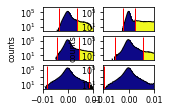

In [7]:
# fig, axs = plt.subplots(7,1, figsize=(5,15))

import matplotlib
col = matplotlib.cm.get_cmap('plasma')

#load mask
roimask = h.load('roimask')

fig = plt.figure(figsize=(2,1.5))

gs = matplotlib.gridspec.GridSpec(3, 2)

axs1 = fig.add_subplot(gs[0, 0])
axs2 = fig.add_subplot(gs[0, 1])

axs4 = fig.add_subplot(gs[1, 0])
axs5 = fig.add_subplot(gs[1, 1])

axs7 = fig.add_subplot(gs[2, 0])
axs8 = fig.add_subplot(gs[2, 1])

icmin = -0.010 
icmax = 0.010

all_val = eigenbrain_s[~np.isnan(eigenbrain_s)]
upper = np.histogram(all_val[all_val > thresh_s], bins = 75)
lower = np.histogram(all_val[all_val < thresh_s], bins = 75)

axs1.fill_between(upper[1][:-1], upper[0], color = col(255), step='mid')
axs1.fill_between(lower[1][:-1], lower[0], color = col(0), step='mid')
axs1.plot(upper[1][:-1], upper[0], linewidth=1, c='k')
axs1.plot(lower[1][:-1], lower[0], linewidth=1, c='k')
axs1.vlines([-thresh_s, thresh_s], ymin=0, ymax=1000000, color='r', linewidth=1, zorder=10)
axs1.set_xlim([icmin,icmax])
axs1.set_xticks([])
axs1.set_yscale('log')
axs1.set_yticks([10**1, 10**3, 10**5])
axs1.set_yticklabels(['$10^1$','', '$10^5$'])

all_val = eigenbrain_s2[~np.isnan(eigenbrain_s2)]
upper = np.histogram(all_val[all_val > thresh_s2], bins = 75)
lower = np.histogram(all_val[all_val < thresh_s2], bins = 75)

axs2.fill_between(upper[1][:-1], upper[0], color = col(255), step='mid')
axs2.fill_between(lower[1][:-1], lower[0], color = col(0), step='mid')
axs2.plot(upper[1][:-1], upper[0], linewidth=1, c='k')
axs2.plot(lower[1][:-1], lower[0], linewidth=1, c='k')
axs2.vlines([-thresh_s2, thresh_s2], ymin=0, ymax=1000000, color='r', linewidth=1, zorder=10)

axs2.set_xlim([icmin,icmax])
axs2.set_xticks([])
axs2.set_yscale('log')
axs2.set_yticks([10**1, 10**3, 10**5])
axs2.set_yticklabels(['$10^1$','', '$10^5$'])


all_val = eigenbrain_a[~np.isnan(eigenbrain_a)]

upper = np.histogram(all_val[all_val > thresh_a], bins = 75)
lower = np.histogram(all_val[all_val < thresh_a], bins = 75)
axs4.fill_between(upper[1][:-1],0, upper[0], color = col(255), step='mid')
axs4.fill_between(lower[1][:-1],0, lower[0], color = col(0), step='mid')
axs4.plot(upper[1][:-1], upper[0], linewidth=1, c='k')
axs4.plot(lower[1][:-1], lower[0], linewidth=1, c='k')
axs4.vlines([-thresh_a, thresh_a], ymin=0, ymax=1000000, color='r', linewidth=1, zorder=10)
axs4.set_xlim([icmin,icmax])
axs4.set_xticks([])
axs4.set_yscale('log')
axs4.set_ylabel('counts')
axs4.set_yticks([10**1, 10**3, 10**5])
axs4.set_yticklabels(['$10^1$','', '$10^5$'])

all_val = eigenbrain_a2[~np.isnan(eigenbrain_a2)]

upper = np.histogram(all_val[all_val > thresh_a2], bins = 75)
lower = np.histogram(all_val[all_val < thresh_a2], bins = 75)
axs5.fill_between(upper[1][:-1],0, upper[0], color = col(255), step='mid')
axs5.fill_between(lower[1][:-1],0, lower[0], color = col(0), step='mid')
axs5.plot(upper[1][:-1], upper[0], linewidth=1, c='k')
axs5.plot(lower[1][:-1], lower[0], linewidth=1, c='k')
axs5.vlines([-thresh_a2, thresh_a2], ymin=0, ymax=1000000, color='r', linewidth=1, zorder=10)

axs5.set_xlim([icmin,icmax])
axs5.set_xticks([])
axs5.set_yscale('log')
axs5.set_ylabel('counts')
axs5.set_yticks([10**1, 10**3, 10**5])
axs5.set_yticklabels(['$10^1$','', '$10^5$'])

all_val = eigenbrain_o[~np.isnan(eigenbrain_o)]

upper = np.histogram(all_val[all_val > thresh_o], bins = 75)
lower = np.histogram(all_val[all_val < thresh_o], bins = 75)

axs7.fill_between(upper[1][:-1],0, upper[0], color = col(255), step='mid')
axs7.fill_between(lower[1][:-1],0, lower[0], color = col(0), step='mid')
axs7.plot(upper[1][:-1], upper[0], linewidth=1, c='k')
axs7.plot(lower[1][:-1], lower[0], linewidth=1, c='k')
axs7.vlines([-thresh_o, thresh_o], ymin=0, ymax=1000000, color='r', linewidth=1, zorder=10)
# axs7.set_xlim([0,5.5])
axs7.set_xlim([icmin,icmax])
axs7.set_yscale('log')
axs7.set_yticks([10**1, 10**3, 10**5])
axs7.set_yticklabels(['$10^1$','', '$10^5$'])

all_val = eigenbrain_o2[~np.isnan(eigenbrain_o2)]

upper = np.histogram(all_val[all_val > thresh_o2], bins = 75)
lower = np.histogram(all_val[all_val < thresh_o2], bins = 75)

axs8.fill_between(upper[1][:-1],0, upper[0], color = col(255), step='mid')
axs8.fill_between(lower[1][:-1],0, lower[0], color = col(0), step='mid')
axs8.plot(upper[1][:-1], upper[0], linewidth=1, c='k')
axs8.plot(lower[1][:-1], lower[0], linewidth=1, c='k')
axs8.vlines([-thresh_o2, thresh_o2], ymin=0, ymax=1000000, color='r', linewidth=1, zorder=10)
# axs7.set_xlim([0,5.5])
axs8.set_xlim([icmin,icmax])
axs8.set_yscale('log')
axs8.set_yticks([10**1, 10**3, 10**5])
axs8.set_yticklabels(['$10^1$','', '$10^5$'])

if save: 
    plt.savefig(save_dir+'ic_threshold_hist.svg', dpi = 600)
plt.show()

-0.01 0.01


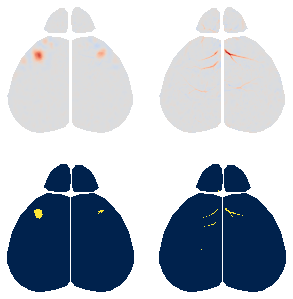

In [8]:
# fig, axs = plt.subplots(7,1, figsize=(5,15))
fig = plt.figure(figsize=(5,7))

axs0 = plt.subplot2grid((5,2),(0,0),rowspan=2)
axs1 = plt.subplot2grid((5,2),(2,0),rowspan=2)
axs3 = plt.subplot2grid((5,2),(0,1),rowspan=2)
axs4 = plt.subplot2grid((5,2),(2,1),rowspan=2)

roimask = roimask.astype(np.float32)
roimask[roimask==0]=np.nan

print(icmin, icmax)

axs0.imshow(eigenbrain_s, vmin = icmin, vmax = icmax, cmap = 'coolwarm')
axs0.axis('off')

threshmask = np.zeros_like(eigenbrain_s)
threshmask[eigenbrain_s > thresh_s]=1
threshmask*=roimask[::-1,:]
axs1.imshow(threshmask, cmap = 'cividis', vmin=0,vmax=1,interpolation='none')
axs1.axis('off')


axs3.imshow(eigenbrain_a, vmin = icmin, vmax = icmax, cmap = 'coolwarm')
axs3.axis('off')

threshmask = np.zeros_like(eigenbrain_a)
threshmask[eigenbrain_a > thresh_a]=1
threshmask*=roimask[::-1,:]
axs4.imshow(threshmask, cmap = 'cividis', vmin=0,vmax=1,interpolation='none')
axs4.axis('off')


if save: 
    plt.savefig(save_dir+'signal_artifact_fig.svg', dpi = 600)

plt.show()

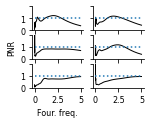

In [9]:
start = 4800
end = 5100
time = np.arange(tc_s[start:end].shape[0])/10

fig = plt.figure(figsize=(2,1.5))

gs = matplotlib.gridspec.GridSpec(3,2)
ax0 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax1 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])


w = wave(tc_s, fps =10, plot = False)
w.globalWaveletSpectrum()

nyq = 0.5 * 1/w.cadence
linetype = ['-','-.','--',':']
fam_signif, sigList = w.familySig(dof=w.period_size, sigtest=1)

# Plot the significance
ax0.plot(w.flambda, w.gws/fam_signif[1],c='k', linewidth=1) 
ax0.hlines(1, xmin=0, xmax=5, 
         linestyle = linetype[3])
#ax2.set_xlabel('Fourier frquency')
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.yaxis.set_ticks_position('left')
ax0.xaxis.set_ticks_position('bottom')
ax0.set_ylim([0,2])
ax0.set_xticks([0,2.5,5])
ax0.set_xticklabels([])
ax0.set_yticks([0,1,2])
ax0.set_yticklabels([0,1,''])

w = wave(tc_s2, fps =10, plot = False)
w.globalWaveletSpectrum()

nyq = 0.5 * 1/w.cadence
linetype = ['-','-.','--',':']
fam_signif, sigList = w.familySig(dof=w.period_size, sigtest=1)

# Plot the significance
ax2.plot(w.flambda, w.gws/fam_signif[1],c='k', linewidth=1) 
ax2.hlines(1, xmin=0, xmax=5, 
         linestyle = linetype[3])
#ax2.set_xlabel('Fourier frquency')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_ylim([0,2])
ax2.set_xticks([0,2.5,5])
ax2.set_xticklabels([])
ax2.set_yticks([0,1,2])
ax2.set_yticklabels([])



w = wave(tc_a, fps =10, plot = False)
w.globalWaveletSpectrum()

nyq = 0.5 * 1/w.cadence
linetype = ['-','-.','--',':']
fam_signif, sigList = w.familySig(dof=w.period_size, sigtest=1)
lab = str(sigList[1]) + ' quantile of red Noise'

# Plot the significance
ax1.plot(w.flambda, w.gws/fam_signif[1],c='k', linewidth=1) 
ax1.hlines(1, xmin=0, xmax=5, 
         linestyle = linetype[3])
# ax3.set_title('Power spectrum of artifact')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylim([0,2])
# ax3.set_ylabel('Power-noise ratio')
ax1.set_xticks([0,2.5,5])
ax1.set_xticklabels([])
ax1.set_ylabel('PNR')
ax1.set_yticks([0,1,2])
ax1.set_yticklabels([0,1,''])


w = wave(tc_a2, fps =10, plot = False)
w.globalWaveletSpectrum()

nyq = 0.5 * 1/w.cadence
linetype = ['-','-.','--',':']
fam_signif, sigList = w.familySig(dof=w.period_size, sigtest=1)
lab = str(sigList[1]) + ' quantile of red Noise'

# Plot the significance
ax3.plot(w.flambda, w.gws/fam_signif[1],c='k', linewidth=1) 
ax3.hlines(1, xmin=0, xmax=5, 
         linestyle = linetype[3])
# ax3.set_title('Power spectrum of artifact')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')
ax3.set_ylim([0,2])
# ax3.set_ylabel('Power-noise ratio')
ax3.set_xticks([0,2.5,5])
ax3.set_xticklabels([])
ax3.set_yticks([0,1,2])
ax3.set_yticklabels([])


w = wave(tc_o, fps =10, plot = False)
w.globalWaveletSpectrum()

nyq = 0.5 * 1/w.cadence
linetype = ['-','-.','--',':']
fam_signif, sigList = w.familySig(dof=w.period_size, sigtest=1)

# Plot the significance
ax4.plot(w.flambda, w.gws/fam_signif[1],c='k', linewidth=1) 
ax4.hlines(1, xmin=0, xmax=5, 
         linestyle = linetype[3])
#ax2.set_xlabel('Fourier frquency')
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.yaxis.set_ticks_position('left')
ax4.xaxis.set_ticks_position('bottom')
ax4.set_ylim([0,2])
ax4.set_xlabel('Four. freq.')
ax4.set_xticks([0,2.5,5])
ax4.set_xticklabels([0,2.5,5])
ax4.set_yticks([0,1,2])
ax4.set_yticklabels([0,1,''])

w = wave(tc_o2, fps =10, plot = False)
w.globalWaveletSpectrum()

nyq = 0.5 * 1/w.cadence
linetype = ['-','-.','--',':']
fam_signif, sigList = w.familySig(dof=w.period_size, sigtest=1)

# Plot the significance
ax5.plot(w.flambda, w.gws/fam_signif[1],c='k', linewidth=1) 
ax5.hlines(1, xmin=0, xmax=5, 
         linestyle = linetype[3])
#ax2.set_xlabel('Fourier frquency')
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.yaxis.set_ticks_position('left')
ax5.xaxis.set_ticks_position('bottom')
ax5.set_ylim([0,2])
# ax5.set_xlabel('Four. freq.')
ax5.set_xticks([0,2.5,5])
ax5.set_xticklabels([0,2.5,5])
ax5.set_yticks([0,1,2])
ax5.set_yticklabels([])



# ax2.set_ylabel('normalized power (to variance)')
# plt.tight_layout()
if save: 
    plt.savefig(save_dir+'tc_powerspec_only_4.svg', dpi = 600)
plt.show()

## Feature distribtions

/tmp/ipykernel_412920/3299282011.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data2)


Index(['age', 'freq.avgsnr', 'freq.integrate', 'freq.maxsnr',
       'freq.maxsnr.freq', 'freq.range.high', 'freq.range.low', 'freq.rangesz',
       'length', 'mass.perc', 'mass.region', 'mass.total', 'region.centroid.0',
       'region.centroid.1', 'region.eccentricity', 'region.extent',
       'region.majaxis', 'region.majmin.ratio', 'region.minaxis',
       'region.orient', 'signal', 'spatial.COMall.x', 'spatial.COMall.y',
       'spatial.COMdom.x', 'spatial.COMdom.y', 'spatial.avg', 'spatial.max',
       'spatial.min', 'spatial.n.domains', 'spatial.std', 'temporal.autocorr',
       'temporal.max', 'temporal.min', 'temporal.n.freq', 'temporal.std',
       'threshold.area', 'threshold.perc', 'anml', 'artifact', 'hemodynamic',
       'movement'],
      dtype='object')


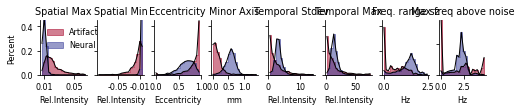

In [10]:
wd = './data/'
file = 'training_dataset.tsv'
novel = 'novel_dataset.tsv'
data =pd.read_csv(wd + file, sep = '\t', index_col = 'exp_ic')
data2 =pd.read_csv(wd + novel, sep = '\t', index_col = 'exp_ic')
data = data.append(data2)
data['region.minaxis']*=6.75
data['region.minaxis']/=1000

print(data.columns)

fig = plt.figure(figsize=(8,1))


col = plt.cm.get_cmap('RdYlBu_r',2)

axs0 = plt.subplot2grid((1,8),(0,0))
axs1 = plt.subplot2grid((1,8),(0,1))
axs2 = plt.subplot2grid((1,8),(0,2))
axs3 = plt.subplot2grid((1,8),(0,3))
axs4 = plt.subplot2grid((1,8),(0,4))
axs5 = plt.subplot2grid((1,8),(0,5))
axs6 = plt.subplot2grid((1,8),(0,6))
axs7 = plt.subplot2grid((1,8),(0,7))

signal = data[data.signal == 1]
artifact = data[data.signal == 0]

art = np.histogram(artifact['spatial.max'][(~np.isnan(artifact['spatial.max']))&(artifact['spatial.max']<0.07)], bins = 20)
sig = np.histogram(signal['spatial.max'][~np.isnan(signal['spatial.max'])&(signal['spatial.max']<0.07)], bins = art[1])
axs0.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs0.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(0), step='mid', alpha=0.5, label='Neural')
axs0.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs0.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs0.set_title('Spatial Max')
axs0.set_xlabel('Rel.Intensity')
axs0.spines['right'].set_visible(False)
axs0.spines['top'].set_visible(False)
axs0.yaxis.set_ticks_position('left')
axs0.xaxis.set_ticks_position('bottom')
axs0.set_xticks([0.01, 0.05])
axs0.set_xticklabels([0.01, 0.05])
axs0.set_ylim([0, 0.45])
axs0.legend(frameon=False)
axs0.set_ylabel('Percent')

art = np.histogram(artifact['spatial.min'][(~np.isnan(artifact['spatial.min']))&(artifact['spatial.max']>-0.05)], bins = 20)
sig = np.histogram(signal['spatial.min'][~np.isnan(signal['spatial.min'])&(signal['spatial.min']>-0.05)], bins = art[1])
axs1.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs1.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(0), step='mid', alpha=0.5, label='Neural')
axs1.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs1.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs1.set_title('Spatial Min')
axs1.set_xlabel('Rel.Intensity')
axs1.spines['right'].set_visible(False)
axs1.spines['top'].set_visible(False)
axs1.yaxis.set_ticks_position('left')
axs1.xaxis.set_ticks_position('bottom')
axs1.set_xticks([-0.05, -0.01])
axs1.set_xticklabels([-0.05, -0.01])
axs1.set_ylim([0, 0.45])
axs1.set_yticklabels([])

art = np.histogram(artifact['region.eccentricity'][~np.isnan(artifact['region.eccentricity'])], bins = 20)
sig = np.histogram(signal['region.eccentricity'][~np.isnan(signal['region.eccentricity'])], bins = art[1])
axs2.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs2.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(0), step='mid', alpha=0.5, label='Neural')
axs2.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs2.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs2.set_title('Eccentricity')
axs2.set_xlabel('Eccentricity')
axs2.spines['right'].set_visible(False)
axs2.spines['top'].set_visible(False)
axs2.yaxis.set_ticks_position('left')
axs2.xaxis.set_ticks_position('bottom')
axs2.set_xticks([0,0.5,1])
axs2.set_ylim([0, 0.45])
axs2.set_yticklabels([])

art = np.histogram(artifact['region.minaxis'][~np.isnan(artifact['region.minaxis'])], bins = 20)
sig = np.histogram(signal['region.minaxis'][~np.isnan(signal['region.minaxis'])], bins = art[1])
axs3.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs3.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(0), step='mid', alpha=0.5, label='Neural')
axs3.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs3.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs3.set_title('Minor Axis')
axs3.set_xlabel('mm')
axs3.spines['right'].set_visible(False)
axs3.spines['top'].set_visible(False)
axs3.yaxis.set_ticks_position('left')
axs3.xaxis.set_ticks_position('bottom')
axs3.set_xticks([0,.5,1])
axs3.set_ylim([0, 0.45])
axs3.set_yticklabels([])

art = np.histogram(artifact['temporal.std'][~np.isnan(artifact['temporal.std'])&(artifact['temporal.std']<15)], bins = 20)
sig = np.histogram(signal['temporal.std'][~np.isnan(signal['temporal.std'])&(signal['temporal.std']<15)], bins = art[1])
axs4.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs4.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(0), step='mid', alpha=0.5, label='Neural')
axs4.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs4.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs4.set_title('Temporal Stdev')
axs4.set_xlabel('Rel.Intensity')
axs4.spines['right'].set_visible(False)
axs4.spines['top'].set_visible(False)
axs4.yaxis.set_ticks_position('left')
axs4.xaxis.set_ticks_position('bottom')
axs4.set_ylim([0, 0.45])
axs4.set_yticklabels([])

art = np.histogram(artifact['temporal.max'][~np.isnan(artifact['temporal.max'])&(artifact['temporal.max']<80)], bins = 20)
sig = np.histogram(signal['temporal.max'][~np.isnan(signal['temporal.max'])&(signal['temporal.max']<80)], bins = art[1])
axs5.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs5.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(0), step='mid', alpha=0.5, label='Neural')
axs5.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs5.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs5.set_title('Temporal Max')
axs5.set_xlabel('Rel.Intensity')
axs5.spines['right'].set_visible(False)
axs5.spines['top'].set_visible(False)
axs5.yaxis.set_ticks_position('left')
axs5.xaxis.set_ticks_position('bottom')
axs5.set_ylim([0, 0.45])
axs5.set_yticklabels([])

sig = np.histogram(signal['freq.rangesz'][~np.isnan(signal['freq.rangesz'])], bins = 20)
art = np.histogram(artifact['freq.rangesz'][~np.isnan(artifact['freq.rangesz'])], bins = sig[1])
axs6.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs6.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(0), step='mid', alpha=0.5, label='Neural')
axs6.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs6.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs6.set_title('Freq. range sz')
axs6.set_xlabel('Hz')
axs6.spines['right'].set_visible(False)
axs6.spines['top'].set_visible(False)
axs6.yaxis.set_ticks_position('left')
axs6.xaxis.set_ticks_position('bottom')
axs6.set_ylim([0, 0.45])
axs6.set_yticklabels([])

sig = np.histogram(signal['freq.range.high'][~np.isnan(signal['freq.range.high'])], bins = 20)
art = np.histogram(artifact['freq.range.high'][~np.isnan(artifact['freq.range.high'])], bins = sig[1])
axs7.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs7.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(0), step='mid', alpha=0.5, label='Neural')
axs7.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs7.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs7.set_title('Max freq above noise')
axs7.set_xlabel('Hz')
axs7.spines['right'].set_visible(False)
axs7.spines['top'].set_visible(False)
axs7.yaxis.set_ticks_position('left')
axs7.xaxis.set_ticks_position('bottom')
axs7.set_ylim([0, 0.35])
axs7.set_yticklabels([])

if save:
    fig.savefig(save_dir+'metrics_example2_samebinsize.svg')
    
# plt.tight_layout()
plt.show()

Index(['age', 'freq.avgsnr', 'freq.integrate', 'freq.maxsnr',
       'freq.maxsnr.freq', 'freq.range.high', 'freq.range.low', 'freq.rangesz',
       'length', 'mass.perc', 'mass.region', 'mass.total', 'region.centroid.0',
       'region.centroid.1', 'region.eccentricity', 'region.extent',
       'region.majaxis', 'region.majmin.ratio', 'region.minaxis',
       'region.orient', 'signal', 'spatial.COMall.x', 'spatial.COMall.y',
       'spatial.COMdom.x', 'spatial.COMdom.y', 'spatial.avg', 'spatial.max',
       'spatial.min', 'spatial.n.domains', 'spatial.std', 'temporal.autocorr',
       'temporal.max', 'temporal.min', 'temporal.n.freq', 'temporal.std',
       'threshold.area', 'threshold.perc', 'anml', 'artifact', 'hemodynamic',
       'movement'],
      dtype='object')


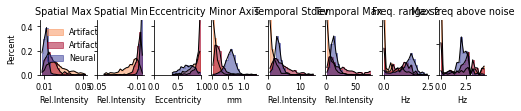

In [11]:
print(data.columns)

fig = plt.figure(figsize=(8,1))

col = plt.cm.get_cmap('RdYlBu',5)

axs0 = plt.subplot2grid((1,8),(0,0))
axs1 = plt.subplot2grid((1,8),(0,1))
axs2 = plt.subplot2grid((1,8),(0,2))
axs3 = plt.subplot2grid((1,8),(0,3))
axs4 = plt.subplot2grid((1,8),(0,4))
axs5 = plt.subplot2grid((1,8),(0,5))
axs6 = plt.subplot2grid((1,8),(0,6))
axs7 = plt.subplot2grid((1,8),(0,7))

signal = data[data.artifact == 0]
artifact = data[data.hemodynamic == 1]
artifact2 = data[data.movement == 1]


art = np.histogram(artifact['spatial.max'][(~np.isnan(artifact['spatial.max']))&(artifact['spatial.max']<0.07)], bins = 20)
sig = np.histogram(signal['spatial.max'][~np.isnan(signal['spatial.max'])&(signal['spatial.max']<0.07)], bins = art[1])
art2 = np.histogram(artifact2['spatial.max'][(~np.isnan(artifact2['spatial.max']))&(artifact2['spatial.max']<0.07)], bins = art[1])
axs0.fill_between(art2[1][:-1], 0, art2[0]/(np.sum(art2[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs0.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(0), step='mid', alpha=0.5, label='Artifact')
axs0.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(5), step='mid', alpha=0.5, label='Neural')
axs0.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs0.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs0.plot(art2[1][:-1], art2[0]/(np.sum(art2[0])), c='k', linewidth=1)
axs0.set_title('Spatial Max')
axs0.set_xlabel('Rel.Intensity')
axs0.spines['right'].set_visible(False)
axs0.spines['top'].set_visible(False)
axs0.yaxis.set_ticks_position('left')
axs0.xaxis.set_ticks_position('bottom')
axs0.set_xticks([0.01, 0.05])
axs0.set_xticklabels([0.01, 0.05])
axs0.set_ylim([0, 0.45])
axs0.legend(frameon=False)
axs0.set_ylabel('Percent')

art = np.histogram(artifact['spatial.min'][(~np.isnan(artifact['spatial.min']))&(artifact['spatial.max']>-0.05)], bins = 20)
sig = np.histogram(signal['spatial.min'][~np.isnan(signal['spatial.min'])&(signal['spatial.min']>-0.05)], bins = art[1])
art2 = np.histogram(artifact2['spatial.min'][(~np.isnan(artifact2['spatial.min']))&(artifact2['spatial.max']>-0.05)], bins = art[1])

axs1.fill_between(art2[1][:-1], 0, art2[0]/(np.sum(art2[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs1.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(0), step='mid', alpha=0.5, label='Artifact')
axs1.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(5), step='mid', alpha=0.5, label='Neural')
axs1.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs1.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs1.plot(art2[1][:-1], art2[0]/(np.sum(art2[0])), c='k', linewidth=1)
axs1.set_title('Spatial Min')
axs1.set_xlabel('Rel.Intensity')
axs1.spines['right'].set_visible(False)
axs1.spines['top'].set_visible(False)
axs1.yaxis.set_ticks_position('left')
axs1.xaxis.set_ticks_position('bottom')
axs1.set_xticks([-0.05, -0.01])
axs1.set_xticklabels([-0.05, -0.01])
axs1.set_ylim([0, 0.45])
axs1.set_yticklabels([])

art = np.histogram(artifact['region.eccentricity'][~np.isnan(artifact['region.eccentricity'])], bins = 20)
sig = np.histogram(signal['region.eccentricity'][~np.isnan(signal['region.eccentricity'])], bins = art[1])
art2 = np.histogram(artifact2['region.eccentricity'][~np.isnan(artifact2['region.eccentricity'])], bins = art[1])
axs2.fill_between(art2[1][:-1], 0, art2[0]/(np.sum(art2[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs2.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(0), step='mid', alpha=0.5, label='Artifact')
axs2.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(5), step='mid', alpha=0.5, label='Neural')
axs2.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs2.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs2.plot(art2[1][:-1], art2[0]/(np.sum(art2[0])), c='k', linewidth=1)
axs2.set_title('Eccentricity')
axs2.set_xlabel('Eccentricity')
axs2.spines['right'].set_visible(False)
axs2.spines['top'].set_visible(False)
axs2.yaxis.set_ticks_position('left')
axs2.xaxis.set_ticks_position('bottom')
axs2.set_xticks([0,0.5,1])
axs2.set_ylim([0, 0.45])
axs2.set_yticklabels([])

art = np.histogram(artifact['region.minaxis'][~np.isnan(artifact['region.minaxis'])], bins = 20)
sig = np.histogram(signal['region.minaxis'][~np.isnan(signal['region.minaxis'])], bins = art[1])
art2 = np.histogram(artifact2['region.minaxis'][~np.isnan(artifact2['region.minaxis'])], bins =  art[1])
axs3.fill_between(art2[1][:-1], 0, art2[0]/(np.sum(art2[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs3.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(0), step='mid', alpha=0.5, label='Artifact')
axs3.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(5), step='mid', alpha=0.5, label='Neural')
axs3.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs3.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs3.plot(art2[1][:-1], art2[0]/(np.sum(art2[0])), c='k', linewidth=1)
axs3.set_title('Minor Axis')
axs3.set_xlabel('mm')
axs3.spines['right'].set_visible(False)
axs3.spines['top'].set_visible(False)
axs3.yaxis.set_ticks_position('left')
axs3.xaxis.set_ticks_position('bottom')
axs3.set_xticks([0,.5,1])
axs3.set_ylim([0, 0.45])
axs3.set_yticklabels([])

art = np.histogram(artifact['temporal.std'][~np.isnan(artifact['temporal.std'])&(artifact['temporal.std']<15)], bins = 20)
sig = np.histogram(signal['temporal.std'][~np.isnan(signal['temporal.std'])&(signal['temporal.std']<15)], bins = art[1])
art2 = np.histogram(artifact2['temporal.std'][~np.isnan(artifact2['temporal.std'])&(artifact2['temporal.std']<15)], bins = art[1])
axs4.fill_between(art2[1][:-1], 0, art2[0]/(np.sum(art2[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs4.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(0), step='mid', alpha=0.5, label='Artifact')
axs4.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(5), step='mid', alpha=0.5, label='Neural')
axs4.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs4.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs4.plot(art2[1][:-1], art2[0]/(np.sum(art2[0])), c='k', linewidth=1)
axs4.set_title('Temporal Stdev')
axs4.set_xlabel('Rel.Intensity')
axs4.spines['right'].set_visible(False)
axs4.spines['top'].set_visible(False)
axs4.yaxis.set_ticks_position('left')
axs4.xaxis.set_ticks_position('bottom')
axs4.set_ylim([0, 0.45])
axs4.set_yticklabels([])

art = np.histogram(artifact['temporal.max'][~np.isnan(artifact['temporal.max'])&(artifact['temporal.max']<80)], bins = 20)
sig = np.histogram(signal['temporal.max'][~np.isnan(signal['temporal.max'])&(signal['temporal.max']<80)], bins = art[1])
art2 = np.histogram(artifact2['temporal.max'][~np.isnan(artifact2['temporal.max'])&(artifact2['temporal.max']<80)], bins = art[1])

axs5.fill_between(art2[1][:-1], 0, art2[0]/(np.sum(art2[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs5.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(0), step='mid', alpha=0.5, label='Artifact')
axs5.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(5), step='mid', alpha=0.5, label='Neural')
axs5.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs5.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs5.plot(art2[1][:-1], art2[0]/(np.sum(art2[0])), c='k', linewidth=1)
axs5.set_title('Temporal Max')
axs5.set_xlabel('Rel.Intensity')
axs5.spines['right'].set_visible(False)
axs5.spines['top'].set_visible(False)
axs5.yaxis.set_ticks_position('left')
axs5.xaxis.set_ticks_position('bottom')
axs5.set_ylim([0, 0.45])
axs5.set_yticklabels([])

sig = np.histogram(signal['freq.rangesz'][~np.isnan(signal['freq.rangesz'])], bins = 20)
art = np.histogram(artifact['freq.rangesz'][~np.isnan(artifact['freq.rangesz'])], bins = sig[1])
art2 = np.histogram(artifact2['freq.rangesz'][~np.isnan(artifact2['freq.rangesz'])], bins = sig[1])
axs6.fill_between(art2[1][:-1], 0, art2[0]/(np.sum(art2[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs6.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(0), step='mid', alpha=0.5, label='Artifact')
axs6.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(5), step='mid', alpha=0.5, label='Neural')
axs6.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs6.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs6.plot(art2[1][:-1], art2[0]/(np.sum(art2[0])), c='k', linewidth=1)
axs6.set_title('Freq. range sz')
axs6.set_xlabel('Hz')
axs6.spines['right'].set_visible(False)
axs6.spines['top'].set_visible(False)
axs6.yaxis.set_ticks_position('left')
axs6.xaxis.set_ticks_position('bottom')
axs6.set_ylim([0, 0.45])
axs6.set_yticklabels([])

sig = np.histogram(signal['freq.range.high'][~np.isnan(signal['freq.range.high'])], bins = 20)
art = np.histogram(artifact['freq.range.high'][~np.isnan(artifact['freq.range.high'])], bins = sig[1])
art2 = np.histogram(artifact2['freq.range.high'][~np.isnan(artifact2['freq.range.high'])], bins = sig[1])
axs7.fill_between(art2[1][:-1], 0, art2[0]/(np.sum(art2[0])), color = col(1), step='mid', alpha=0.5, label='Artifact')
axs7.fill_between(art[1][:-1], 0, art[0]/(np.sum(art[0])), color = col(0), step='mid', alpha=0.5, label='Artifact')
axs7.fill_between(sig[1][:-1], 0, sig[0]/(np.sum(sig[0])), color = col(5), step='mid', alpha=0.5, label='Neural')
axs7.plot(sig[1][:-1], sig[0]/(np.sum(sig[0])), c='k', linewidth=1)
axs7.plot(art[1][:-1], art[0]/(np.sum(art[0])), c='k', linewidth=1)
axs7.plot(art2[1][:-1], art2[0]/(np.sum(art2[0])), c='k', linewidth=1)
axs7.set_title('Max freq above noise')
axs7.set_xlabel('Hz')
axs7.spines['right'].set_visible(False)
axs7.spines['top'].set_visible(False)
axs7.yaxis.set_ticks_position('left')
axs7.xaxis.set_ticks_position('bottom')
axs7.set_ylim([0, 0.35])
axs7.set_yticklabels([])

# plt.tight_layout()

if save:
    fig.savefig(save_dir+'metrics_example2_samebinsize_three.svg')
plt.show()
